# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.162846e+01     7.268126e+00
 * time: 0.0019991397857666016
     1     2.767225e+01     4.546939e+00
 * time: 0.00858616828918457
     2     1.850783e+01     4.264890e+00
 * time: 0.01596212387084961
     3     1.231691e+01     2.845470e+00
 * time: 0.023818016052246094
     4     1.127393e+01     3.144798e+00
 * time: 0.029967069625854492
     5     1.035917e+01     1.962836e+00
 * time: 0.03511309623718262
     6     9.619369e+00     1.451595e+00
 * time: 0.04080510139465332
     7     9.029263e+00     1.037459e+00
 * time: 0.046708106994628906
     8     8.553655e+00     7.508930e-01
 * time: 0.05229616165161133
     9     8.242120e+00     5.045792e-01
 * time: 0.05907106399536133
    10     8.138661e+00     4.149454e-01
 * time: 0.06630206108093262
    11     8.090539e+00     3.206022e-01
 * time: 0.07346320152282715
    12     8.053359e+00     4.112750e-01
 * time: 0.07862401008605957
    13     8.008619e+00     3.025320e-01
 * 

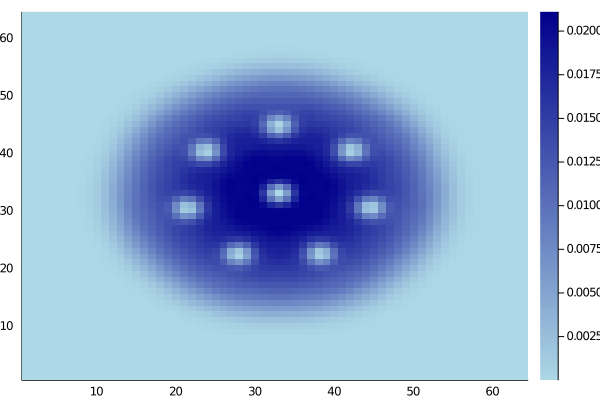

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)